### INTRODUCTION TO MATPLOTLIB

In [113]:
## Importing necessary libraries : Pandas, NumPy, and Matplotlib 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# Load the dataset
telecom = pd.read_csv(r'C:\Users\mahmud kamai\Desktop\telecom_churn.csv')

In [115]:
print(telecom)

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [116]:
# Displaying the first five rows of the dataset
telecom.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## PART 1: Understanding Customer Distribution

# Bar chart

In [117]:
# Displaying the number of customers in the top 10 states
Top_10_states = telecom['State'].value_counts().head(10)
Top_10_states

State
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
Name: count, dtype: int64

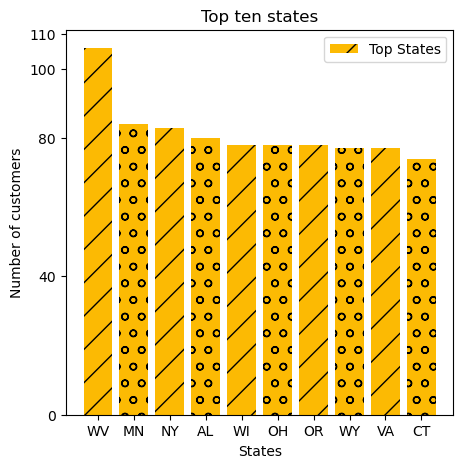

In [118]:
# Bar chart showing the number of customers in the top 10 states
plt.figure(figsize = (5,5), dpi = 100)
plt.yticks([0,40,80,100,110])
plt.title('Top ten states')
plt.xlabel('States')
plt.ylabel('Number of customers')
Tp = plt.bar(Top_10_states.index, Top_10_states.values, color='#fcba03', label='Top States')
patterns = ['/', 'o', '/', 'o', '/', 'o', '/', 'o', '/', 'o']
for t in Tp:
    t.set_hatch(patterns.pop(0))
    
plt.legend()
plt.savefig('mygraph.png', dpi = 300)
plt.show()

In [119]:
# visualization of Account length among customers : Histogram
telecom['Account length'].head(10)

0    128
1    107
2    137
3     84
4     75
5    118
6    121
7    147
8    117
9    141
Name: Account length, dtype: int64

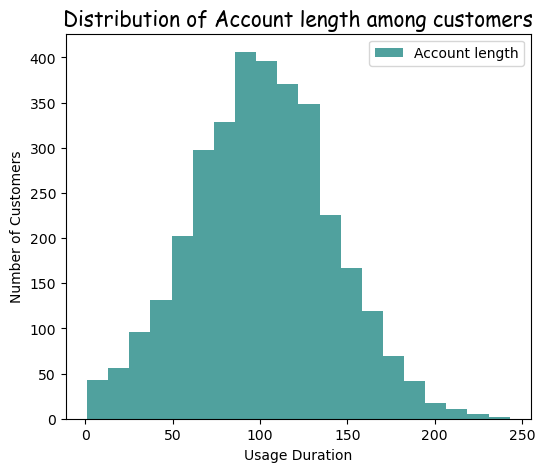

In [120]:
plt.figure(figsize=(6,5))
plt.hist(telecom['Account length'], bins = 20, color ='#50a19e', label = 'Account length')
plt.title('Distribution of Account length among customers', fontdict = {'fontname': 'Comic Sans Ms', 'fontsize': '15'})
plt.ylabel('Number of Customers')
plt.xlabel('Usage Duration')
plt.legend()
plt.show()

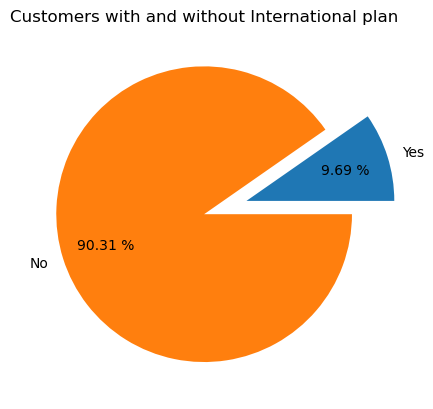

In [121]:
## Piechart that display the proportion of customers with and without an 'International plan'
# filter the dataset
yes = telecom.loc[telecom['International plan'] == 'Yes'].count().iloc[0]
no = telecom.loc[telecom['International plan'] == 'No'].count().iloc[0]

# plot the piechart
e = (0.3,0)
plt.pie([yes, no], labels = ['Yes','No'], autopct = '%.2f %%', pctdistance = 0.7, explode = e)
plt.title('Customers with and without International plan')
plt.show()

## Part 2: Call and Charge Analysis

In [122]:
## Scatter plot :Total Day Minutes vs Total Day Charges.
sct = telecom[["Total day minutes", "Total day charge"]]
sct

,Total day minutes,Total day charge
0,265.1,45.07
1,161.6,27.47
2,243.4,41.38
3,299.4,50.90
4,166.7,28.34
...,...,...
3328,156.2,26.55
3329,231.1,39.29
3330,180.8,30.74
3331,213.8,36.35


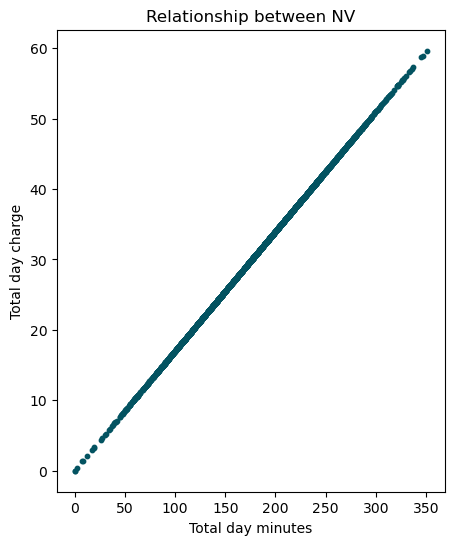

In [123]:
# This graph shows that there is a strong relationship between the numerical variables.
plt.figure(figsize=(5,6))
plt.scatter(telecom["Total day minutes"], telecom["Total day charge"], c = '#035361', s=10)
plt.title('Relationship between NV')
plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.show()

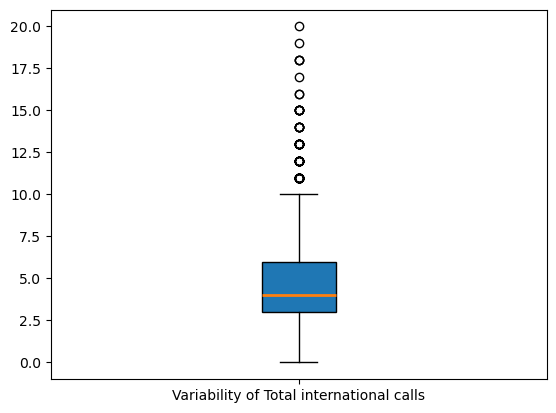

In [124]:
## Boxplot: Create a box plot for "Total International Calls" to identify variability and outliers.
boxes = plt.boxplot(telecom['Total intl calls'], labels = ['Variability of Total international calls'],patch_artist = True, medianprops = 
{'linewidth': 2})
plt.show()

In [125]:
## Heatmap: Generate a heatmap of the correlation matrix for the columns related to minutes, calls, and charges.
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [126]:
# Use list comprehension to filter the data.
columns =[col for col in telecom.columns if any (keyword in col for keyword in ['minutes', 'calls', 'charge'])]
columns

['Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

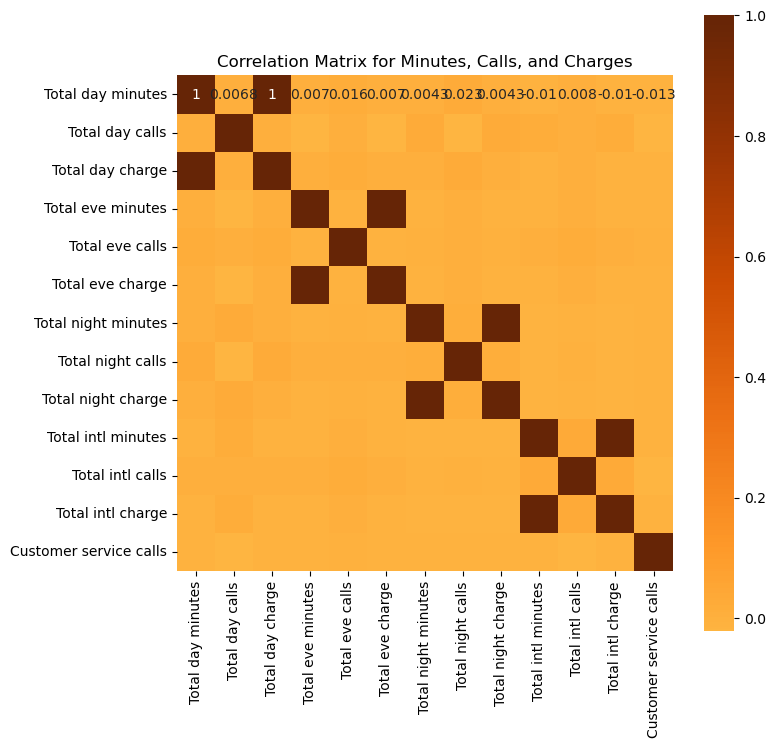

In [127]:
# correlation matrix
correlation = telecom[columns].corr()
# heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='YlOrBr', center = 0.117, square=True)
plt.title('Correlation Matrix for Minutes, Calls, and Charges')
plt.show()

## Part 3: Churn Analysis

In [128]:
#grouped_data = telecom.groupby(['Churn', 'International plan', 'Voice mail plan']).size()

# Plotting the stacked bar chart
#grouped_data.plot(kind='line', stacked=True, figsize=(10, 7), color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])


In [129]:
# Line Plot: Plot a line chart showing the average "Customer Service Calls" for churned vs. non-churned customers.
Average_cs_calls = telecom.groupby(['Churn'])['Customer service calls'].mean() 
Average_cs_calls

Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64

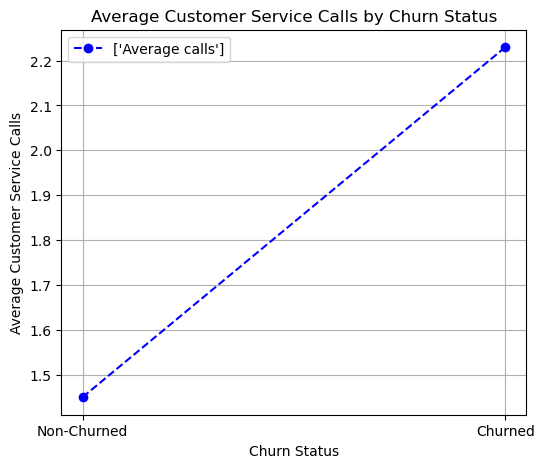

In [130]:
# plot a line plot
plt.figure(figsize = (6,5))
plt.plot(Average_cs_calls.index, Average_cs_calls.values, label = ['Average calls'], c ='blue', marker = 'o', linestyle='--')
plt.title('Average Customer Service Calls by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Customer Service Calls')
plt.grid(True, linestyle='-')
plt.xticks([0, 1], labels=['Non-Churned', 'Churned'])
plt.legend()
plt.show()

In [131]:
##Count Plot: Use a count plot to display the number of churned and non-churned customers across different states.